# Probability Distribution: Introduction

In [probability theory](https://en.wikipedia.org/wiki/Probability_theory) and [statistics](https://en.wikipedia.org/wiki/statistics), a probability distribution is a [mathematical function](https://en.wikipedia.org/wiki/Function_(mathematics)) that, stated in simple terms, can be thought of as providing the probabilities of occurrence of different possible outcomes in an experiment. 

In more technical terms, the probability distribution is a description of a random phenomenon in terms of the probabilities of events. Examples of random phenomena can include the results of an experiment or survey. A probability distribution is defined in terms of an underlying sample space, which is the set of all possible outcomes of the random phenomenon being observed. The sample space may be the set of [real numbers](https://en.wikipedia.org/wiki/Real_number) or a higher-dimensional [vector space](https://en.wikipedia.org/wiki/Vector_space), or it may be a list of non-numerical values; for example, the sample space of a coin flip would be {_heads, tails_}.

![Bell curve](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg)

### Discrete and Continuous Distributions

Probability distributions are generally divided into two classes. A __discrete probability distribution__ (applicable to the scenarios where the set of possible outcomes is discrete, such as a coin toss or a roll of dice) can be encoded by a discrete list of the probabilities of the outcomes, known as a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function). On the other hand, a __continuous probability distribution__ (applicable to the scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day) is typically described by probability density functions (with the probability of any individual outcome actually being 0). Such distributions are generally described with the help of [probability density functions](https://en.wikipedia.org/wiki/Probability_density_function).

### Univariate and Multivariate Distributions

A probability distribution whose sample space is the set of real numbers is called __univariate__, while a distribution whose sample space is a vector space is called __multivariate__. A univariate distribution gives the probabilities of a single random variable taking on various alternative values; a multivariate distribution (a [joint probability distribution](https://en.wikipedia.org/wiki/Joint_probability_distribution)) gives the probabilities of a random vector—a list of two or more random variables—taking on various combinations of values. Important and commonly encountered univariate probability distributions include the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution), the [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution), and the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). The [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is a commonly encountered multivariate distribution.
![Hypergeometric distribution](https://upload.wikimedia.org/wikipedia/commons/c/c1/HypergeometricPDF.png)

**=====================================================================================================================**

## Some Essential Terminologies

* __Mode__: for a discrete random variable, the value with highest probability (the location at which the probability mass function has its peak); for a continuous random variable, a location at which the probability density function has a local peak.
* __Support__: the smallest closed set whose complement has probability zero.
* __Head__: the range of values where the pmf or pdf is relatively high.
* __Tail__: the complement of the head within the support; the large set of values where the pmf or pdf is relatively low.
* __Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.
* __Median__: the value such that the set of values less than the median, and the set greater than the median, each have probabilities no greater than one-half.
* __Variance__: the second moment of the pmf or pdf about the mean; an important measure of the dispersion of the distribution.
* __Standard deviation__: the square root of the variance, and hence another measure of dispersion.



* __Symmetry__: a property of some distributions in which the portion of the distribution to the left of a specific value is a mirror image of the portion to its right.
* __Skewness__: a measure of the extent to which a pmf or pdf "leans" to one side of its mean. The third standardized moment of the distribution.
* __Kurtosis__: a measure of the "fatness" of the tails of a pmf or pdf. The fourth standardized moment of the distribution.

![kurtosis](https://anotherbloodybullshitblog.files.wordpress.com/2016/01/normal-not-always-the-norm.gif?w=809)

**=====================================================================================================================**

## Python library for statistical distributions

The __[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)__ library is the quintessential collection of statistical functions and methods for various probability distribuutions in the Python ecosystem. We leverage this package fully for this notebook.



**=====================================================================================================================**

## In this notebook, we discuss about most important _discrete distributions_
* **Bernoulli distribution**
* **Binomial distribution**
* **Poisson distribution**
* **Geometric distribution**

**=====================================================================================================================**

## Bernoulii distribution

The Bernoulli distribution, named after Swiss mathematician [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli), is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$ — i.e., the probability distribution of any single experiment that asks a ___yes–no question___; the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability $p$ and failure/no/false/zero with probability $q$. 

It can be used to represent a coin toss where 1 and 0 would represent "head" and "tail" (or vice versa), respectively. In particular, unfair coins would have $p ≠ 0.5$.

The probability mass function $f$ of this distribution, over possible outcomes $k$, is

$${\displaystyle f(k;p)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}}$$

In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from scipy.stats import bernoulli

#### Generate random variates

In [39]:
# p=0.5 i.e. fair coin ( pièce parfaite non truquée)
bernoulli.rvs(p=0.5,size=10)# 10 rélaisation ( jeter la pièce 10 fois )

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [45]:
# p=0.2 i.e. more tails than heads
bernoulli.rvs(p=0.2,size=10)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [48]:
# p=0.8 i.e. more heads than tails
bernoulli.rvs(p=0.8,size=10)

# 1 ===> pile 
# 0 ===> face

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

#### Note, a single run or even a small number of runs may not produce the expected distribution of 1's and 0's. For example, if you assign $p=0.5$, you may not get half 1's and half 0's every time you evaluate the function. Experiment with $N$ number of trials to see how the probability distribution gradually centers around 0.5.

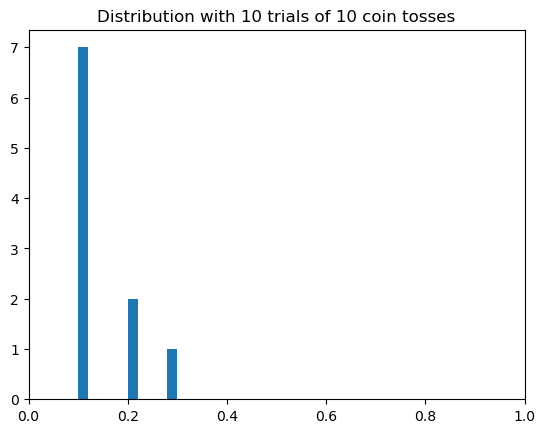

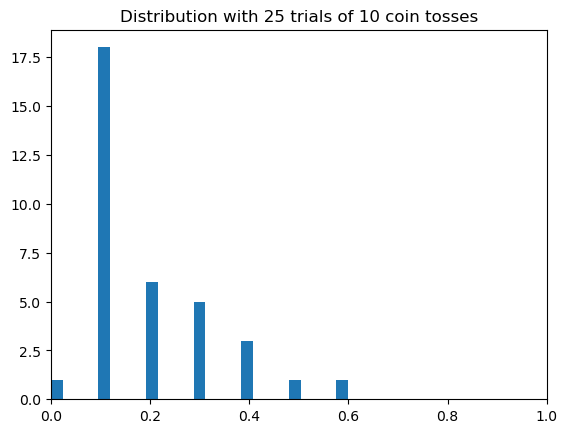

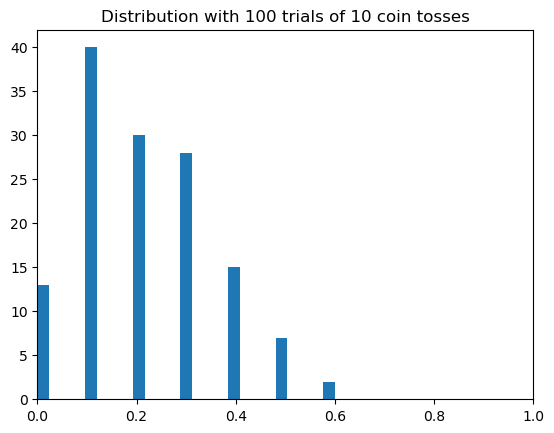

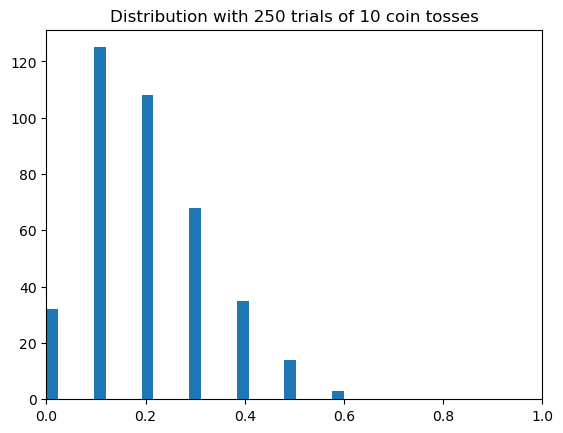

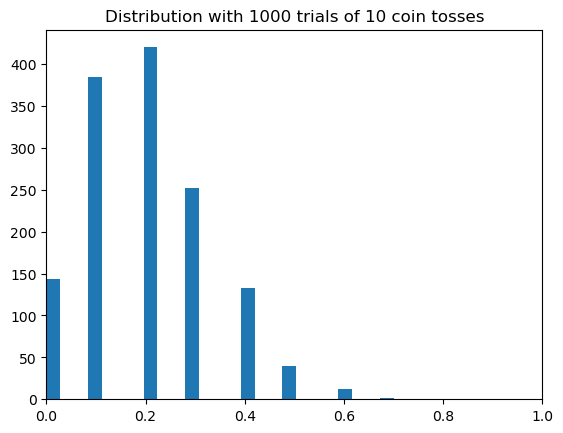

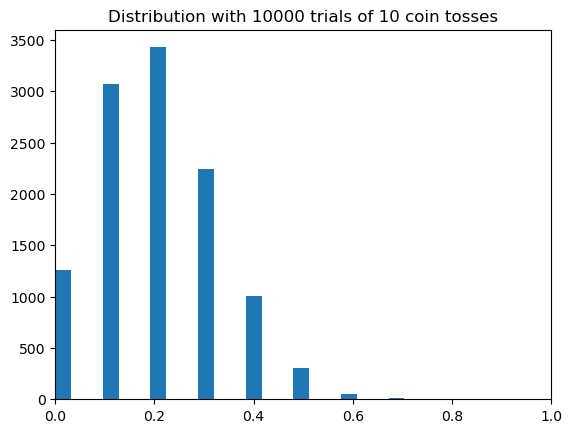

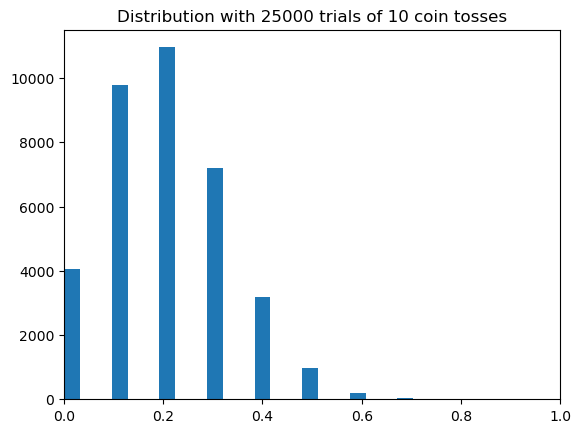

In [54]:
N_trials = [10,25,100,250,1000,10000,25000] # Number of trials
pr=0.2 # Fair coin toss probability
av = [] # Empty list to store the average of the random variates

# Generate 10 variates every time and take the average. That should be # of 1's i.e. 0.5 for a fair coin.
for i in N_trials:
    for n in range(1,i+1):
        av.append(np.mean(bernoulli.rvs(p=pr,size=10)))
    if (i==10):
        plt.title("Distribution with {} trials of 10 coin tosses".format(i))
        plt.hist(av,bins=10)
        plt.xlim(0.0,1.0)
        plt.show()
    else:
        plt.title("Distribution with {} trials of 10 coin tosses".format(i))
        plt.hist(av,bins=25)
        plt.xlim(0.0,1.0)
        plt.show()

#### Mean, variance, skew, and kurtosis

In [55]:
print("A fair coin is spinning...\n"+"-"*30)
pr=0.5 # Fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow a biased coin is spinning...\n"+"-"*35)
pr=0.2 # Biased coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin is spinning...
------------------------------
Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0

Now a biased coin is spinning...
-----------------------------------
Mean: 0.2
Variance: 0.16000000000000003
Skew: 1.4999999999999993
Kurtosis: 0.2499999999999991


#### Standard deviation, mean, median, entropy

In [57]:
print("\nA biased coin with likelihood 0.3 is spinning...\n"+"-"*50)
pr=0.3
print("Std. dev:",bernoulli.std(p=pr))
print("Mean:",bernoulli.mean(p=pr))
print("Median:",bernoulli.median(p=pr))
print("Entropy:",bernoulli.entropy(p=pr))


A biased coin with likelihood 0.3 is spinning...
--------------------------------------------------
Std. dev: 0.458257569495584
Mean: 0.3
Median: 0.0
Entropy: 0.6108643020548935


#### Probability mass function (pmf) and cumulative distribution function (cdf)

In [58]:
rv = bernoulli(0.6)
x=0
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=0.5
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=1.0
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=1.2
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))

Probability mass function for 0: 0.4
Probability mass function for 0.5: 0.623757440986941
Probability mass function for 1.0: 0.6
Probability mass function for 1.2: 0.0


In [59]:
print("CDF for x < 0:",rv.cdf(-2))
print("CDF for 0< x <1:",rv.cdf(0.75))
print("CDF for x >1:",rv.cdf(2))

CDF for x < 0: 0.0
CDF for 0< x <1: 0.4
CDF for x >1: 1.0


#### For the complete list of functions and methods please [see this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli).

**=====================================================================================================================**

## Binomial distribution

The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a _yes–no question_, and each with its own boolean-valued outcome: a random variable containing single bit of information: success/yes/true/one (with probability $p$) or failure/no/false/zero (with probability $q = 1 − p$). A single success/failure experiment is also called a __Bernoulli trial__ or __Bernoulli experiment__ and a sequence of outcomes is called a __Bernoulli process__. For a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution. The binomial distribution is the basis for the popular [binomial test](https://en.wikipedia.org/wiki/Binomial_test) of [statistical significance](https://en.wikipedia.org/wiki/Statistical_significance).

The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. If the sampling is carried out without replacement, the draws are not independent and so the resulting distribution is a __[hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)__, not a binomial one. However, for N much larger than n, the binomial distribution remains a good approximation, and is widely used.

In general, if the random variable $X$ follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly $k$ successes in $n$ trials is given by the probability mass function:

$${\Pr(k;n,p)=\Pr(X=k)={n \choose k}p^{k}(1-p)^{n-k}}$$

for k = 0, 1, 2, ..., n, where

$${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$$

In [ ]:
from scipy.stats import binom

#### Generate random variates

In [62]:
# 8 coins are flipped (or 1 coin is flipped 8 times), each with probability of success (1) of 0.25
# This trial/experiment is repeated for 10 times
k=binom.rvs(8,0.25,size=10000)
print("Number of success for each trial:",k)
print("Average of the success:", np.mean(k))

"""
n=8====>represente le nombre n ( le nombre d'expérience)
p=0.25 ===> représente la probabilité d'avoir un succé lorsque on tente une fois l'expériance

E(X)=n*p=8*0.25=2

"""

Number of success for each trial: [1 1 3 ... 3 2 2]
Average of the success: 2.0026


"\n8====>represente le nombre n ( le nombre d'expérience)\n0.25 ===> représente la probabilité d'avoir un succé lorsque on tente une fois l'expériance\n"

#### Moments - Mean, variance, skew, and kurtosis

$$E(X) = n.p,\ Var(X)= n.p(1 - p), \textbf{skewness}= \frac{1-2p}{\sqrt{n.p(1-p)}}, \ \textbf{kurtosis}= \frac{1-6p(1-p)}{n.p(1-p)}$$

Just as an example, the proof for mean is given below,

${\displaystyle \mu =\sum _{i=0}^{n}x_{i}p_{i},}$
${\displaystyle {\begin{aligned}\mu &=\sum _{k=0}^{n}k{\binom {n}{k}}p^{k}(1-p)^{n-k}\\&=np\sum _{k=0}^{n}k{\frac {(n-1)!}{(n-k)!k!}}p^{k-1}(1-p)^{(n-1)-(k-1)}\\&=np\sum _{k=1}^{n}{\frac {(n-1)!}{((n-1)-(k-1))!(k-1)!}}p^{k-1}(1-p)^{(n-1)-(k-1)}\\&=np\sum _{k=1}^{n}{\binom {n-1}{k-1}}p^{k-1}(1-p)^{(n-1)-(k-1)}\\&=np\sum _{\ell =0}^{n-1}{\binom {n-1}{\ell }}p^{\ell }(1-p)^{(n-1)-\ell }&&{\text{with }}\ell :=k-1\\&=np\sum _{\ell =0}^{m}{\binom {m}{\ell }}p^{\ell }(1-p)^{m-\ell }&&{\text{with }}m:=n-1\\&=np(p+(1-p))^{m}\\&=np\end{aligned}}}$

In [63]:
print("A fair coin is spinning 5 times\n"+"-"*35)
pr=0.5 # Fair coin toss probability
n=5
mean, var, skew, kurt = binom.stats(n=n,p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow a biased coin is spinning 5 times...\n"+"-"*45)
pr=0.7 # Biased coin toss probability
n=5
mean, var, skew, kurt = binom.stats(n=n,p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin is spinning 5 times
-----------------------------------
Mean: 2.5
Variance: 1.25
Skew: 0.0
Kurtosis: -0.4

Now a biased coin is spinning 5 times...
---------------------------------------------
Mean: 3.5
Variance: 1.0500000000000003
Skew: -0.39036002917941315
Kurtosis: -0.24761904761904757


#### Standard deviation, mean, median, entropy

_Entropy_ = $\frac12 \log_2 \big( 2\pi e\, np(1-p) \big) + O \left( \frac{1}{n} \right)$

_std.dev_ = $\sqrt{n.p(1-p)}$

In [64]:
n=5
pr=0.7
print("\n{} biased coins with likelihood {} are spinning...\n".format(n,pr)+"-"*50)
print("Std. dev:",binom.std(n=n,p=pr))
print("Mean:",binom.mean(n=n,p=pr))
print("Median:",binom.median(n=n,p=pr))
print("Entropy:",binom.entropy(n=n,p=pr))


5 biased coins with likelihood 0.7 are spinning...
--------------------------------------------------
Std. dev: 1.02469507659596
Mean: 3.5
Median: 4.0
Entropy: 1.413614855283445


#### Visualize the probability mass function (pmf)

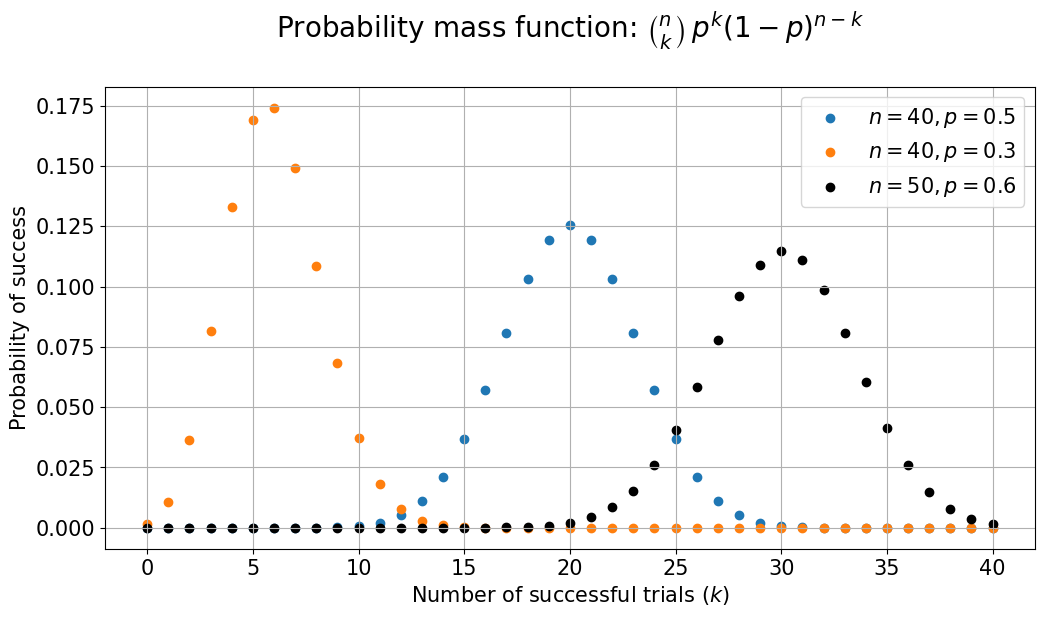

In [65]:
n=40
pr=0.5
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf1 = rv.pmf(x)

n=40
pr=0.15
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf2 = rv.pmf(x)

n=50
pr=0.6
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(12,6))
plt.title("Probability mass function: $\\binom{n}{k}\, p^k (1-p)^{n-k}$\n",fontsize=20)
plt.scatter(x,pmf1)
plt.scatter(x,pmf2)
plt.scatter(x,pmf3,c='k')
plt.legend(["$n=40, p=0.5$","$n=40, p=0.3$","$n=50, p=0.6$"],fontsize=15)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("Probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Visualize the cumulative distrubition function (cdf)

Cumulative distribution function for binomial distribution can also be represented in terms of the [regularized incomplete beta function](https://en.wikipedia.org/wiki/Regularized_incomplete_beta_function), as follows

$${\displaystyle {\begin{aligned}F(k;n,p)&=\Pr(X\leq k)\\&=I_{1-p}(n-k,k+1)\\&=(n-k){n \choose k}\int _{0}^{1-p}t^{n-k-1}(1-t)^{k}\,dt.\end{aligned}}}$$

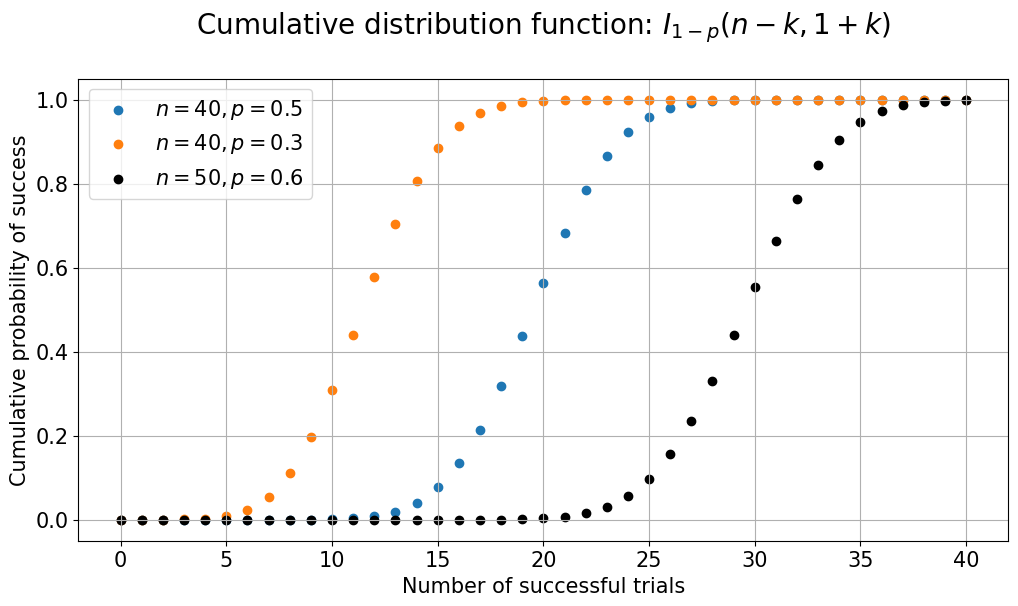

In [66]:
n=40
pr=0.5
rv = binom(n,pr)
x=np.arange(0,41,1)
cdf1 = rv.cdf(x)

n=40
pr=0.3
rv = binom(n,pr)
x=np.arange(0,41,1)
cdf2 = rv.cdf(x)

n=50
pr=0.6
rv = binom(n,pr)
x=np.arange(0,41,1)
cdf3 = rv.cdf(x)

plt.figure(figsize=(12,6))
plt.title("Cumulative distribution function: $I_{1-p}(n - k, 1 + k)$\n",fontsize=20)
plt.scatter(x,cdf1)
plt.scatter(x,cdf2)
plt.scatter(x,cdf3,c='k')
plt.legend(["$n=40, p=0.5$","$n=40, p=0.3$","$n=50, p=0.6$"],fontsize=15)
plt.xlabel("Number of successful trials",fontsize=15)
plt.ylabel("Cumulative probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Interval that contains a specific percentage of distribution

In [67]:
n=40
pr=0.3
percent=25
interval = binom.interval(percent/100,n,pr,loc=0)
print("Interval that contains {} percent of distribution is: {}".format(percent,interval))


Interval that contains 25 percent of distribution is: (11.0, 13.0)


$$P(X\in [11,13])=0.25$$

$$X \sim B(n=40,p=0.3)$$

#### For the complete list of functions and methods please [see this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

**=====================================================================================================================**

## Poisson Distribution

The Poisson distribution (named after French mathematician Siméon Denis Poisson), is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. If receiving any particular piece of mail does not affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then a reasonable assumption is that the number of pieces of mail received in a day obeys a Poisson distribution. Other examples that may follow a Poisson include
* number of phone calls received by a call center per hour 
* number of decay events per second from a radioactive source
* The number of meteors greater than 1 meter diameter that strike Earth in a year
* The number of patients arriving in an emergency room between 10 and 11 pm

** Poisson distribution is a limiting case of a Binomial Distribution where the number of trials is sufficiently bigger than the number of successes one is asking about i.e. $n>>1>>p$**

In [ ]:
from scipy.stats import poisson

#### Display probability mass function (pmf)

An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $\lambda$. This is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation

${\displaystyle P(k{\text{ events in interval}})=e^{-\lambda }{\frac {\lambda ^{k}}{k!}}}$

where,

${\lambda}$ is the average number of events per interval

e is the number 2.71828... (Euler's number) the base of the natural logarithms

k takes values 0, 1, 2, …
k! = k × (k − 1) × (k − 2) × … × 2 × 1 is the factorial of k.

$$ X \sim \text{poisson}(0.2)$$
$X$ représente le nombre de client qui arrivent au mall of sousse dans un intervalle de temps

${\displaystyle P({\text{ 50 personnes arrivent au mall of sousse dans un intervalle de temp}})=e^{-0.2 }{\frac {0.2 ^{50}}{50!}}}$


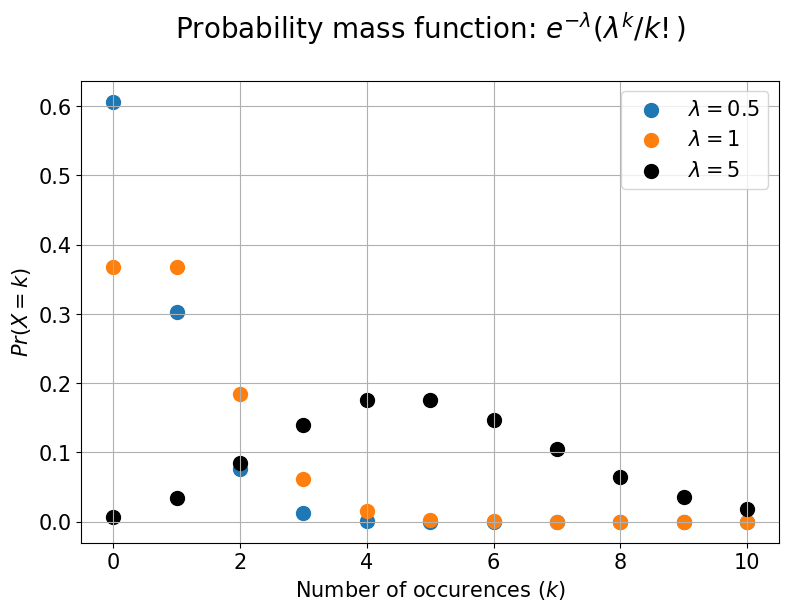

In [68]:
la=0.5
rv = poisson(la)
x=np.arange(0,11,1)
pmf1 = rv.pmf(x)

la=1
rv = poisson(la)
x=np.arange(0,11,1)
pmf2 = rv.pmf(x)

la=5
rv = poisson(la)
x=np.arange(0,11,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(9,6))
plt.title("Probability mass function: $e^{-\lambda}{(\lambda^k/k!)}$\n",fontsize=20)
plt.scatter(x,pmf1,s=100)
plt.scatter(x,pmf2,s=100)
plt.scatter(x,pmf3,c='k',s=100)
plt.legend(["$\lambda=0.5$","$\lambda=1$","$\lambda=5$"],fontsize=15)
plt.xlabel("Number of occurences ($k$)",fontsize=15)
plt.ylabel("$Pr(X=k)$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Display cumulative distribution function (cdf)

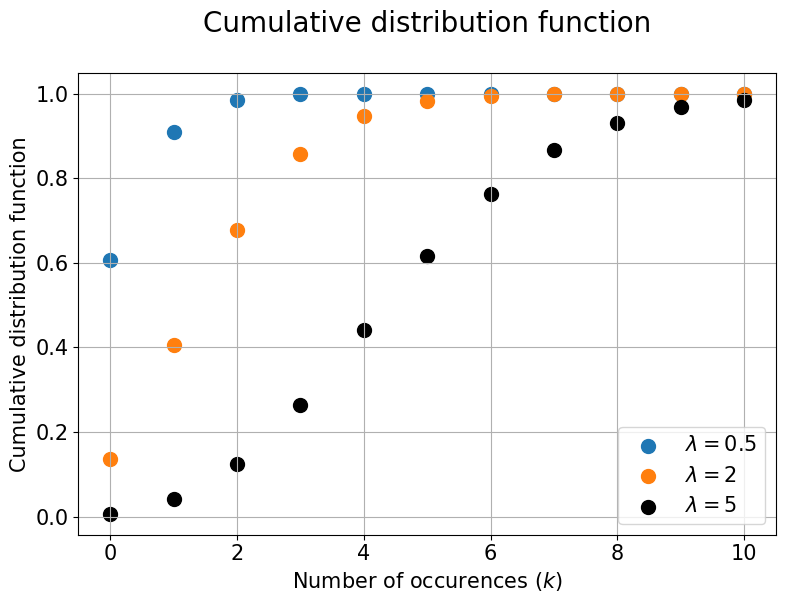

In [69]:
la=0.5
rv = poisson(la)
x=np.arange(0,11,1)
cdf1 = rv.cdf(x)

la=2
rv = poisson(la)
x=np.arange(0,11,1)
cdf2 = rv.cdf(x)

la=5
rv = poisson(la)
x=np.arange(0,11,1)
cdf3 = rv.cdf(x)

plt.figure(figsize=(9,6))
plt.title("Cumulative distribution function\n",fontsize=20)
plt.scatter(x,cdf1,s=100)
plt.scatter(x,cdf2,s=100)
plt.scatter(x,cdf3,c='k',s=100)
plt.legend(["$\lambda=0.5$","$\lambda=2$","$\lambda=5$"],fontsize=15)
plt.xlabel("Number of occurences ($k$)",fontsize=15)
plt.ylabel("Cumulative distribution function",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Moments - mean, variance, skew, and kurtosis
Various moments of a Poisson distributed random variable $X$ are as follows:

$$ E(X)=\lambda,\ Var(X)=\lambda,\ \textbf{skewness}=\frac {1}{\sqrt{\lambda}},\ \textbf{kurtosis}=\frac{1}{\lambda}$$

In [70]:
print("For small lambda\n"+"-"*25)
la=0.5
mean, var, skew, kurt = poisson.stats(mu=la, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow for large lambda\n"+"-"*30)
la=5
mean, var, skew, kurt = poisson.stats(mu=la, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

For small lambda
-------------------------
Mean: 0.5
Variance: 0.5
Skew: 1.4142135623730951
Kurtosis: 2.0

Now for large lambda
------------------------------
Mean: 5.0
Variance: 5.0
Skew: 0.4472135954999579
Kurtosis: 0.2


#### Standard deviation, mean, median, entropy

In [71]:
la=5
print("For lambda = {}\n-------------------------".format(la))
print("Std. dev:",poisson.std(mu=la))
print("Mean:",poisson.mean(mu=la))
print("Median:",poisson.median(mu=la))
print("Entropy:",poisson.entropy(mu=la))

For lambda = 5
-------------------------
Std. dev: 2.23606797749979
Mean: 5.0
Median: 5.0
Entropy: 2.204395243428367


#### Generate random variates

In [72]:
la=5
r = poisson.rvs(mu=la, size=20)
print("Random variates with lambda={}: {}".format(la,r))

la=0.5
r = poisson.rvs(mu=la, size=20)
print("Random variates with lambda={}: {}".format(la,r))

Random variates with lambda=5: [2 4 4 4 2 3 4 6 5 8 4 5 8 9 6 5 8 7 4 0]
Random variates with lambda=0.5: [0 0 1 2 0 3 0 0 0 1 2 0 1 1 0 0 2 0 0 0]


### Show that Poisson distribution is a limiting case of Binomial distribution for large $n$ and small $p$

In [73]:
from ipywidgets import interact,interactive
import ipywidgets as widgets
from IPython.display import display

In [74]:
def rv_plot(n,p):
    n=n
    la=n*p
    rv_binom=binom(n,p)
    rv_poisson=poisson(la)
    x=np.arange(1,n+1,1)
    pmf_binom=rv_binom.pmf(x)
    pmf_poisson=rv_poisson.pmf(x)
    y_max=max(max(pmf_binom),max(pmf_poisson))*1.25
    plt.figure(figsize=(max(7,int(n/3)),5))
    plt.scatter(x,pmf_binom,s=100,edgecolors='k')
    plt.scatter(x,pmf_poisson,s=100,edgecolors='k')
    plt.legend(['Binomial distribution, $n$:{},$p$:{}'.format(n,p),
                'Poisson distribution, $\lambda$:{}'.format(n*p)],fontsize=12)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Occurences ($k$)",fontsize=15)
    plt.ylabel("$Pr(X=k$",fontsize=15)
    plt.ylim(ymin=-0.05,ymax=y_max)
    plt.grid(True)
    plt.show()

In [75]:
print("Move the sliders on sample size (n) or probability (p) and see how the two distributions approach each other. \
\nNote,that lambda or rate parameter of the Poisson distribution is always the product of n and p of the \nBinomial distribution")

w=interactive(rv_plot,n = widgets.IntSlider(value=10,min=10,max=40,step=5,description='Sample: $n$'),
            p=widgets.FloatSlider(value=0.1,min=0.1,max=0.8,step=0.05,description='Probability: $p$'))
display(w)

Move the sliders on sample size (n) or probability (p) and see how the two distributions approach each other. 
Note,that lambda or rate parameter of the Poisson distribution is always the product of n and p of the 
Binomial distribution


interactive(children=(IntSlider(value=10, description='Sample: $n$', max=40, min=10, step=5), FloatSlider(valu…

#### For the complete list of functions and methods please [see this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson).

**=====================================================================================================================**

## Geometric distribution

The geometric distribution is either of two discrete probability distributions:

    The probability distribution of the number X of Bernoulli trials needed to get one success, supported on the set { 1, 2, 3, ...}
    The probability distribution of the number Y = X − 1 of failures before the first success, supported on the set { 0, 1, 2, 3, ... }

Which of these one calls "the" geometric distribution is a matter of convention and convenience.

These two different geometric distributions should not be confused with each other. Often, the name shifted geometric distribution is adopted for the former one (distribution of the number $X$); however, to avoid ambiguity, it is considered wise to indicate which is intended, by mentioning the support explicitly.

The geometric distribution gives the probability that the first occurrence of success requires $k$ independent trials, each with success probability $p$. If the probability of success on each trial is $p$, then the probability that the $k^{th}$ trial (out of $k$ trials) is the first success is

${\displaystyle \Pr(X=k)=(1-p)^{k-1}\,p\,}$

for $k = 1, 2, 3, ....$

The above form of the geometric distribution is used for modeling the number of trials up to and including the first success. By contrast, the following form of the geometric distribution is used for modeling the number of failures until the first success:

${\displaystyle \Pr(Y=k)=(1-p)^{k}\,p\,}$

for $k = 0, 1, 2, 3, ....$

In either case, the sequence of probabilities is a geometric sequence.

The geometric distribution is an appropriate model if the following assumptions are true.

    The phenomenon being modelled is a sequence of independent trials.
    There are only two possible outcomes for each trial, often designated success or failure.
    The probability of success, p, is the same for every trial.

In [76]:
from scipy.stats import geom

#### Generate some random variates

In [77]:
r=geom.rvs(p=0.1,size=10)
print(r)

r=geom.rvs(p=0.5,size=10)
print(r)

[11  9  1 11 13 22 21  8  5  5]
[1 1 3 2 2 1 1 2 2 7]


#### Display probability mass function (pmf)

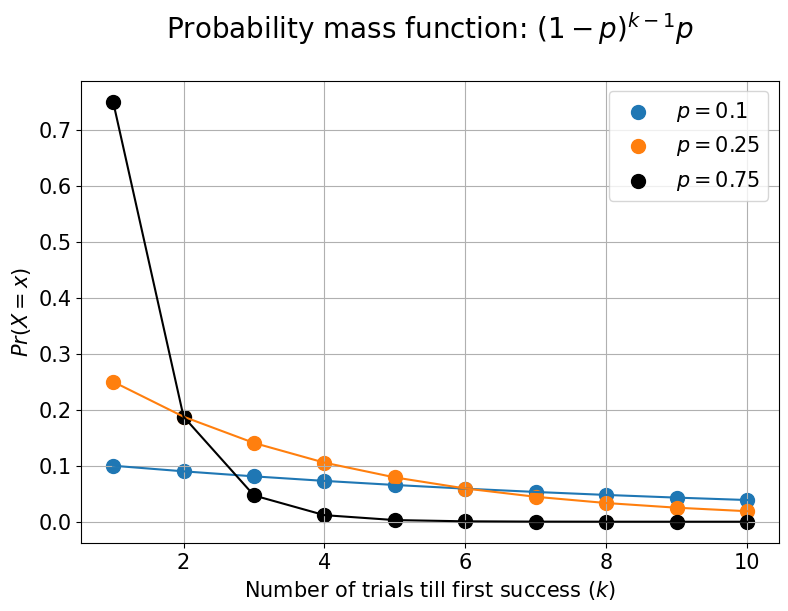

In [78]:
p=0.1
rv = geom(p)
x=np.arange(1,11,1)
pmf1 = rv.pmf(x)

p=0.25
rv = geom(p)
x=np.arange(1,11,1)
pmf2 = rv.pmf(x)

p=0.75
rv = geom(p)
x=np.arange(1,11,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(9,6))
plt.title("Probability mass function: $(1-p)^{k-1}p$\n",fontsize=20)
plt.scatter(x,pmf1,s=100)
plt.scatter(x,pmf2,s=100)
plt.scatter(x,pmf3,c='k',s=100)
plt.plot(x,pmf1)
plt.plot(x,pmf2)
plt.plot(x,pmf3,c='k')
plt.legend(["$p=0.1$","$p=0.25$","$p=0.75$"],fontsize=15)
plt.xlabel("Number of trials till first success ($k$)",fontsize=15)
plt.ylabel("$Pr(X=x)$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Display cumulative distribution function (cdf)

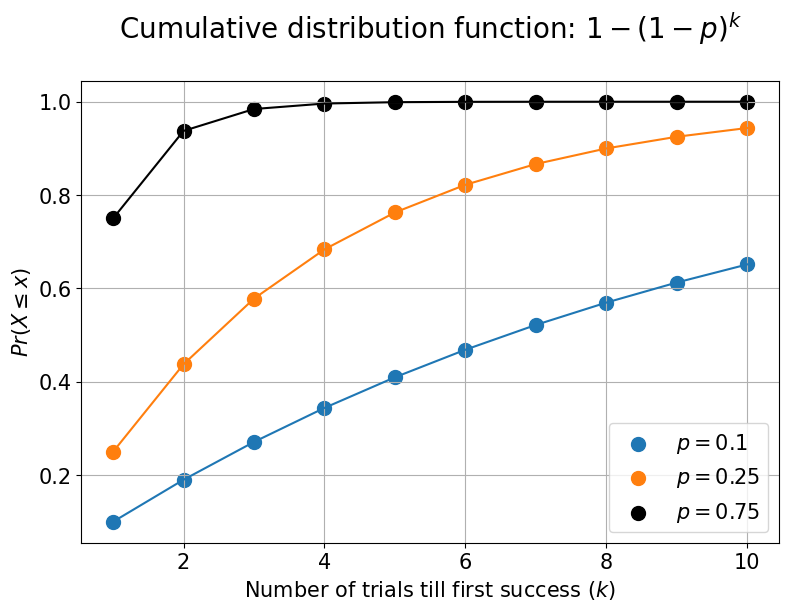

In [79]:
p=0.1
rv = geom(p)
x=np.arange(1,11,1)
cdf1 = rv.cdf(x)

p=0.25
rv = geom(p)
x=np.arange(1,11,1)
cdf2 = rv.cdf(x)

p=0.75
rv = geom(p)
x=np.arange(1,11,1)
cdf3 = rv.cdf(x)

plt.figure(figsize=(9,6))
plt.title("Cumulative distribution function: $1-(1-p)^k$\n",fontsize=20)
plt.scatter(x,cdf1,s=100)
plt.scatter(x,cdf2,s=100)
plt.scatter(x,cdf3,c='k',s=100)
plt.plot(x,cdf1)
plt.plot(x,cdf2)
plt.plot(x,cdf3,c='k')
plt.legend(["$p=0.1$","$p=0.25$","$p=0.75$"],fontsize=15)
plt.xlabel("Number of trials till first success ($k$)",fontsize=15)
plt.ylabel("$Pr(X\leq x)$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Expected value, variance, skewness, kurtosis
Various moments of a geometrically distributed random variable $X$ are as follows:

$$ E(X)=\frac {1}{p},\ Var(X)=\frac {1-p}{p^2},\ \textbf{skewness}=\frac {2-p}{\sqrt{1-p}},\ \textbf{kurtosis}=6+\frac{p^2}{1-p}$$

In [80]:
print("For small p=0.1\n"+"-"*25)
p=0.1
mean, var, skew, kurt = geom.stats(p=p, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)
print("\nNow for large p=0.8\n"+"-"*30)
p=0.8
mean, var, skew, kurt = geom.stats(p=p, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

For small p=0.1
-------------------------
Mean: 10.0
Variance: 90.0
Skew: 2.0027758514399734
Kurtosis: 6.011111111111111

Now for large p=0.8
------------------------------
Mean: 1.25
Variance: 0.3124999999999999
Skew: 2.683281572999748
Kurtosis: 9.200000000000001


#### For the complete list of functions and methods please [see this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom).

**=====================================================================================================================**

## How to calculate expected value of a function (of one variable) with respect to a probability distribution?
Let's say a rational function is $f(x)=\frac {2x^2+3x+1}{x^3+4}$
Therefore, the expected value of that function w.r.t. to a distribution and with lower bound $\textbf{a}$ and upper bound $\textbf{b}$ is given by,

$$\int_{a}^{b}{\frac {2x^2+3x+1}{x^3+4}}.{\ p(x)}$$
where $p(x)$ is the probability mass function corresponding to the distribution.

The awesome scipy.stats allows calculation of such expected value through the ___.expect( ) method___.

In [81]:
def quadratic(x):
    return ((2*x**2+3*x+1)/(x**3+4))
p=0.2 # Shape parameter for the distribution, here p for Geometric distribution
lb=-2 # Lower bound of the integral
ub=2 # Upper bound of the integral
e = geom.expect(quadratic,args=(p,),lb=0,ub=ub)
print("Expected value:",e)

Expected value: 0.5025000000000001
